# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [632]:
df = pd.read_csv("../data/states_edu.csv")
df.head()
print(df.shape)

(1715, 25)


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [633]:
print(df.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


In [634]:
# rename columns to label variables within the same category:
#     Enrollment Data:           ENROLL_[...]
#     Expenditure Data:          EXPEND_[...]
#     Academic Achievement Data: [MATH|READING]_[4|8]th_GRADE
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4th',
    'GRADES_8_G':'ENROLL_8th_GRADE',
    'GRADES_12_G':'ENROLL_12th_GRADE',
    'GRADES_1_8_G':'ENROLL_PREHS',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL_NCES',
    'ENROLL':'ENROLL_ALL_CENSUS',
    'TOTAL_EXPENDITURE': 'EXPEND_TOTAL',
    'SUPPORT_SERVICES_EXPENDITURE': 'EXPEND_SUPPORT_SERVICES',
    'INSTRUCTION_EXPENDITURE': 'EXPEND_INSTRUCTION',
    'OTHER_EXPENDITURE': 'EXPEND_OTHER',
    'CAPITAL_OUTLAY_EXPENDITURE': 'EXPEND_CAPITAL_OUTLAY',
    'AVG_MATH_4_SCORE': 'MATH_4th_GRADE',
    'AVG_MATH_8_SCORE': 'MATH_8th_GRADE',
    'AVG_READING_4_SCORE': 'READING_4th_GRADE',
    'AVG_READING_8_SCORE': 'READING_8th_GRADE'
    },
    axis=1,inplace=True)

df_copy = df.copy()
df_copy.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_CENSUS', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'EXPEND_TOTAL',
       'EXPEND_INSTRUCTION', 'EXPEND_SUPPORT_SERVICES', 'EXPEND_OTHER',
       'EXPEND_CAPITAL_OUTLAY', 'ENROLL_PREK', 'ENROLL_KINDER', 'ENROLL_4th',
       'ENROLL_8th_GRADE', 'ENROLL_12th_GRADE', 'ENROLL_PREHS', 'ENROLL_HS',
       'ENROLL_ALL_NCES', 'MATH_4th_GRADE', 'MATH_8th_GRADE',
       'READING_4th_GRADE', 'READING_8th_GRADE'],
      dtype='object')

In [635]:
df.isna().sum()

PRIMARY_KEY                   0
STATE                         0
YEAR                          0
ENROLL_ALL_CENSUS           491
TOTAL_REVENUE               440
FEDERAL_REVENUE             440
STATE_REVENUE               440
LOCAL_REVENUE               440
EXPEND_TOTAL                440
EXPEND_INSTRUCTION          440
EXPEND_SUPPORT_SERVICES     440
EXPEND_OTHER                491
EXPEND_CAPITAL_OUTLAY       440
ENROLL_PREK                 173
ENROLL_KINDER                83
ENROLL_4th                   83
ENROLL_8th_GRADE             83
ENROLL_12th_GRADE            83
ENROLL_PREHS                695
ENROLL_HS                   644
ENROLL_ALL_NCES              83
MATH_4th_GRADE             1150
MATH_8th_GRADE             1113
READING_4th_GRADE          1065
READING_8th_GRADE          1153
dtype: int64

In [636]:
# only include data relevent to 8th grade math scores
# (drop rows with missing 8th grade math scores)
df.dropna(subset=['MATH_8th_GRADE'], inplace=True)
df.isna().sum()

# Note: some additional data cleaning will be done after feature engineering
#       depending on what features we choose to use in our analysis

PRIMARY_KEY                  0
STATE                        0
YEAR                         0
ENROLL_ALL_CENSUS          205
TOTAL_REVENUE              163
FEDERAL_REVENUE            163
STATE_REVENUE              163
LOCAL_REVENUE              163
EXPEND_TOTAL               163
EXPEND_INSTRUCTION         163
EXPEND_SUPPORT_SERVICES    163
EXPEND_OTHER               205
EXPEND_CAPITAL_OUTLAY      163
ENROLL_PREK                 84
ENROLL_KINDER               74
ENROLL_4th                  74
ENROLL_8th_GRADE            74
ENROLL_12th_GRADE           74
ENROLL_PREHS               205
ENROLL_HS                  154
ENROLL_ALL_NCES             74
MATH_4th_GRADE              38
MATH_8th_GRADE               0
READING_4th_GRADE           81
READING_8th_GRADE          124
dtype: int64

Next, we will investigate the missing values in both the `ENROLL_ALL_CENSUS` and `ENROLL_ALL_NCES` columns.

In [637]:
census_nces_difference = (df["ENROLL_ALL_CENSUS"]-df["ENROLL_ALL_NCES"]) / df["ENROLL_ALL_NCES"]
census_nces_difference.describe()

count    397.000000
mean      -0.025946
std        0.051301
min       -0.450693
25%       -0.031392
50%       -0.013523
75%       -0.003988
max        0.096404
dtype: float64

<Axes: ylabel='Frequency'>

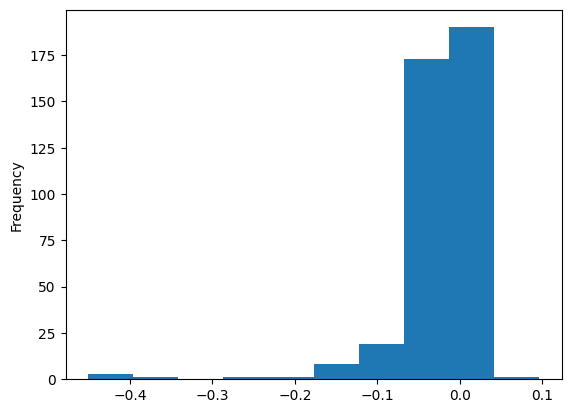

In [638]:
census_nces_difference.plot.hist()

Because the enrollment data from the U.S. Census Bureau and the NCES differ only in minor technical differences (difference exists as a result of "differences in membership (i.e. what is and is not a fourth grade student)" according to the dataset's kaggle info page), we can effectively choose either one as a good estimate of the true enrollment data. Let's choose to use the NCES data as a baseline. In cases where the NCES data has missing values, it turns out that all of the remaining enrollment based columns are also missing. We can drop these rows from our data set, since we will eventually be interested in using enrollment data to predict 8th grade math scores.

In a more in-depth project, we could consider searching online for additional datasets that might have been collected pertaining to U.S. K-12 education; we could possibly find more accurate and reliable enrollment data for the years we are analyzing.

In [639]:
df["YEAR"].value_counts()

YEAR
2003    53
2005    53
2007    53
2009    53
2011    53
2013    53
2015    53
2017    53
2019    53
1992    43
2000    42
1990    39
1996     1
Name: count, dtype: int64

In [640]:
df.dropna(subset=['ENROLL_ALL_NCES'], inplace=True)

In [641]:
df["YEAR"].value_counts()

YEAR
2003    51
2005    51
2007    51
2009    51
2011    51
2013    51
2015    51
2017    51
1992    42
2000    40
1990    38
Name: count, dtype: int64

Notice that we no longer have any information on education from 2019 if we choose to only include records with existing expenditure information. If we want to make any observations about math scores in 2019, we will have to reload the dataset with the missing values preserved.

We will drop rows where we have no expenditure data in any of the columns, similarly to how we excluded records with no enrollment data.

In [642]:
missing_expenditures = df[["EXPEND_TOTAL", "EXPEND_INSTRUCTION", "EXPEND_SUPPORT_SERVICES", "EXPEND_OTHER"]].isna().all(axis=1)
print("Number of missing expenditure records:", missing_expenditures.sum())
df.drop(df[missing_expenditures].index, axis=0, inplace=True)

Number of missing expenditure records: 89


In [643]:
df["YEAR"].value_counts()

YEAR
2003    51
2005    51
2007    51
2009    51
2011    51
2013    51
2015    51
1992    42
2000    40
Name: count, dtype: int64

Similarly to removing missing enrollment data, we have lost all data from 2017 in choosing to only keep records with existing expenditure data.

In [644]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_CENSUS,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,EXPEND_TOTAL,EXPEND_INSTRUCTION,...,ENROLL_4th,ENROLL_8th_GRADE,ENROLL_12th_GRADE,ENROLL_PREHS,ENROLL_HS,ENROLL_ALL_NCES,MATH_4th_GRADE,MATH_8th_GRADE,READING_4th_GRADE,READING_8th_GRADE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **Average score on the 8th Grade NAEP math exam** (`MATH_8th_GRADE`)

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

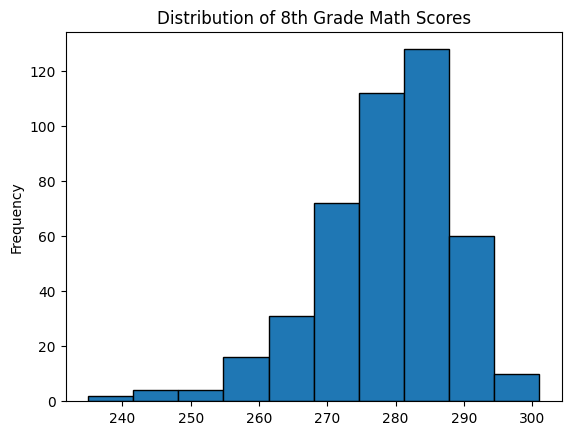

In [645]:
df["MATH_8th_GRADE"].plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

In [646]:
df["MATH_8th_GRADE"].describe()

count    439.000000
mean     278.676538
std       10.086166
min      235.000000
25%      273.000000
50%      281.000000
75%      286.000000
max      301.000000
Name: MATH_8th_GRADE, dtype: float64

There were a number of framework changes of the NAEP Math exams, in both exam content and reporting scale. Grade 12 math exams were reported on a scale of 0 to 500 until 2005, where the reporting scale was changed to 0 to 300. Scores for grades 4 and 8 have been reported from 0 to 300 since the exam's inception. 

Most other changes to grades 4 and 8 were minimal, with framework changes in 2009 and 2005. In 2009, the topic of "Mathematical Reasoning" was added to all grade levels. For grades 4 and 8, the 2005 framework change altered the "cognitive dimension" used to classify mathematics items from mathematical ability and power, to mathematical complexity (see sources for details). 

Sources: 
- https://nces.ed.gov/nationsreportcard/mathematics/frameworkcomparison.aspx
- https://nces.ed.gov/nationsreportcard/mathematics/interpret_results.aspx

In [647]:
df[(df["YEAR"] < 2009) & (df["YEAR"] >= 2005)][["MATH_8th_GRADE"]].describe()

,MATH_8th_GRADE
count,102.000000
mean,279.205882
std,8.754448
min,245.000000
25%,274.000000
50%,281.000000
75%,285.000000
max,298.000000


In [648]:
df[df["YEAR"] < 2005][["MATH_8th_GRADE"]].describe()

,MATH_8th_GRADE
count,133.000000
mean,271.789474
std,10.610210
min,235.000000
25%,265.000000
50%,273.000000
75%,281.000000
max,291.000000


Text(0.5, 0, 'Year')

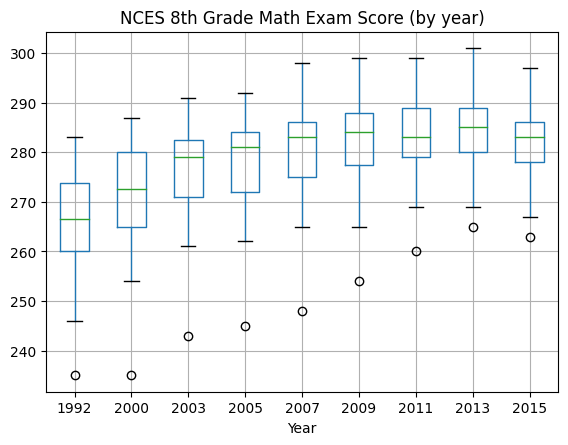

In [649]:
fig, ax = plt.subplots()
df.boxplot(column="MATH_8th_GRADE", by="YEAR", ax=ax)
plt.title("NCES 8th Grade Math Exam Score (by year)")
plt.suptitle("")
plt.xlabel("Year")

Viewing the exam data over time reveals no exaggerated change in the scores in the years 2005 and 2009, so we can ignore any small difference the framework changes may have introduced.

How many years of data are logged in our dataset? 

In [650]:
print(f'There are {df["YEAR"].nunique()} distinct years of data recorded')

There are 9 distinct years of data recorded


In [651]:
#np.sort(df["YEAR"].unique())
df["YEAR"].value_counts()

YEAR
2003    51
2005    51
2007    51
2009    51
2011    51
2013    51
2015    51
1992    42
2000    40
Name: count, dtype: int64

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [652]:
# notice that here, we are including as many 8th grade math data points as possible
# (data points removed from data cleaing process are considered here,
#  since otherwise there is no 2019 data in the dataset)
michigan_math_avg = df_copy[df_copy["STATE"] == "MICHIGAN"][["MATH_8th_GRADE"]].mean()
ohio_math_avg = df_copy[df_copy["STATE"] == "OHIO"][["MATH_8th_GRADE"]].mean()
print("Michigan: ", round(float(michigan_math_avg.iloc[0]),2), "\nOhio: ", round(float(ohio_math_avg.iloc[0]),2), sep="")

Michigan: 276.17
Ohio: 282.25


On average, Ohio beats Michigan in 8th grade NAEP math exam scores between 1996 and 2019

Find the average for your outcome score across all states in 2019

In [653]:
all_states_math_avg_2019 = df_copy[df_copy["YEAR"] == 2019][["MATH_8th_GRADE"]].mean().iloc[0]
print(f"Average 8th grade NAEP Math Exam score in 2019: {round(all_states_math_avg_2019, 2)} / 500 ({round(all_states_math_avg_2019/500*100, 2)}%)")

Average 8th grade NAEP Math Exam score in 2019: 281.26 / 500 (56.25%)


In [654]:
df_copy[df_copy["YEAR"] == 2019][["MATH_8th_GRADE"]].describe()

,MATH_8th_GRADE
count,53.000000
mean,281.264151
std,6.117915
min,269.000000
25%,276.000000
50%,282.000000
75%,286.000000
max,294.000000


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [655]:
df_copy.groupby("STATE")["MATH_8th_GRADE"].max().sort_values(ascending=False)

STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
VERMONT                 295.0
MINNESOTA               295.0
NORTH_DAKOTA            293.0
DODEA                   293.0
MONTANA                 293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
TEXAS                   290.0
WASHINGTON              290.0
VIRGINIA                290.0
KANSAS                  290.0
PENNSYLVANIA            290.0
OHIO                    290.0
WYOMING                 289.0
CONNECTICUT             289.0
WISCONSIN               289.0
MAINE                   289.0
MARYLAND                288.0
NEBRASKA                288.0
INDIANA                 288.0
UTAH                    287.0
IDAHO                   287.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
NATIONAL                285.0
ILLINOIS                285.0
OREGON                  285.0
DELAWARE                284.0
RHODE_ISLAND            284.0
ALAS

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

As recommended, we can begin feature engineering by first calculating altered expenditure columns based on each record's total enrollment. It makes sense that states with larger numbers of students are likely to spend more (not necessarily related to math and reading scores), so dividing the expenditures by enrollment removes this potential for bias in our model predictions.

In [656]:
for expend in ["TOTAL", "INSTRUCTION", "SUPPORT_SERVICES", "OTHER"]:
    df[f"EXPEND_{expend}_PER_STUDENT"] = df[f"EXPEND_{expend}"] / df["ENROLL_ALL_NCES"]

In [657]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_CENSUS', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'EXPEND_TOTAL',
       'EXPEND_INSTRUCTION', 'EXPEND_SUPPORT_SERVICES', 'EXPEND_OTHER',
       'EXPEND_CAPITAL_OUTLAY', 'ENROLL_PREK', 'ENROLL_KINDER', 'ENROLL_4th',
       'ENROLL_8th_GRADE', 'ENROLL_12th_GRADE', 'ENROLL_PREHS', 'ENROLL_HS',
       'ENROLL_ALL_NCES', 'MATH_4th_GRADE', 'MATH_8th_GRADE',
       'READING_4th_GRADE', 'READING_8th_GRADE', 'EXPEND_TOTAL_PER_STUDENT',
       'EXPEND_INSTRUCTION_PER_STUDENT', 'EXPEND_SUPPORT_SERVICES_PER_STUDENT',
       'EXPEND_OTHER_PER_STUDENT'],
      dtype='object')

<Axes: >

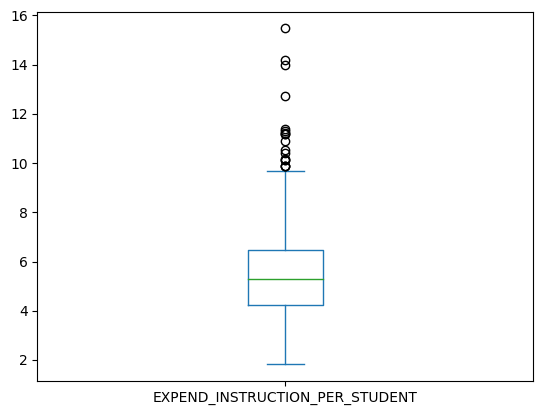

In [658]:
df["EXPEND_INSTRUCTION_PER_STUDENT"].plot.box()

<Axes: ylabel='Frequency'>

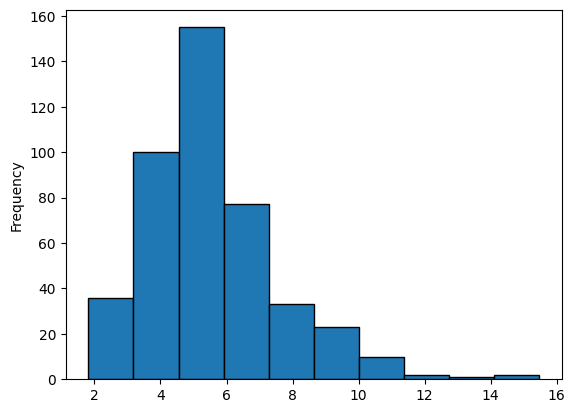

In [659]:
df["EXPEND_INSTRUCTION_PER_STUDENT"].plot.hist(edgecolor="black")

Feature engineering justification: Upon observing the scatterplot of instruction expenditure vs 8th grade exam scores, we see that instruction expenditures (per student) of 10 and above are relatively rare, and do not follow the general upward trend that we see in the remaining points. The boxplot and histogram above both reinforce this observation. We can consider these as outliers, and drop them from the dataset.

Note that this aggressive pruning of outliers could cause predictive errors for real-world cases where the instruction expenditure per student is above 10. However, removing these four data points does improve the linear regression line between instruction expenditure per student and 8th grade math exam scores, which will translate to greater predictive accuracy within our final model (see below).

correlation coefficient = 0.5037864842887362


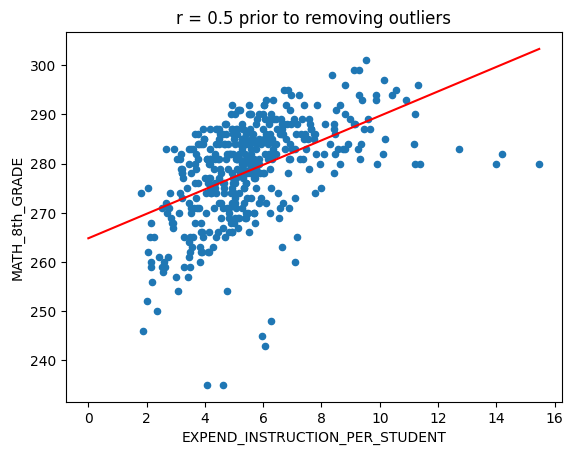

In [660]:
expend_max = df["EXPEND_INSTRUCTION_PER_STUDENT"].max()
df.plot.scatter(x="EXPEND_INSTRUCTION_PER_STUDENT", y="MATH_8th_GRADE")
m, b = np.polyfit(df["EXPEND_INSTRUCTION_PER_STUDENT"],df["MATH_8th_GRADE"],1)
r = df["EXPEND_INSTRUCTION_PER_STUDENT"].corr(df["MATH_8th_GRADE"])
x = np.arange(0, expend_max, 0.001)
plt.plot(x, m*x+b, color="r")
plt.title(f"r = {round(r,2)} prior to removing outliers")
print("correlation coefficient =", r)

In [661]:
df.drop(df[df["EXPEND_INSTRUCTION_PER_STUDENT"] >= 10].index, inplace=True)

correlation coefficient = 0.5361915030361672


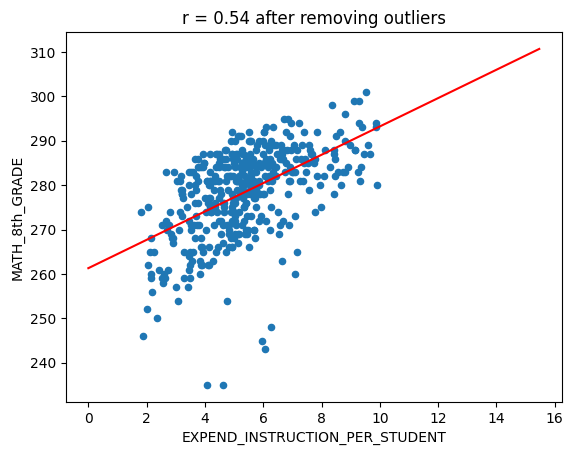

In [662]:
df.plot.scatter(x="EXPEND_INSTRUCTION_PER_STUDENT", y="MATH_8th_GRADE")
m, b = np.polyfit(df["EXPEND_INSTRUCTION_PER_STUDENT"],df["MATH_8th_GRADE"],1)
r = df["EXPEND_INSTRUCTION_PER_STUDENT"].corr(df["MATH_8th_GRADE"])
x = np.arange(0, expend_max, 0.001)
plt.plot(x, m*x+b, color="r")
plt.title(f"r = {round(r,2)} after removing outliers")
print("correlation coefficient =", r)

<Axes: ylabel='Frequency'>

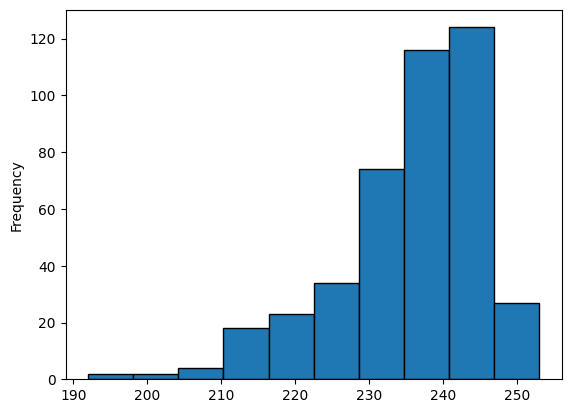

In [663]:
df["MATH_4th_GRADE"].plot.hist(edgecolor="black")

The scatter plot with 4th grade math exam scores as the dependent variable do not show any apparent outliers that do not follow the general upward trend, so we can leave the data as is.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

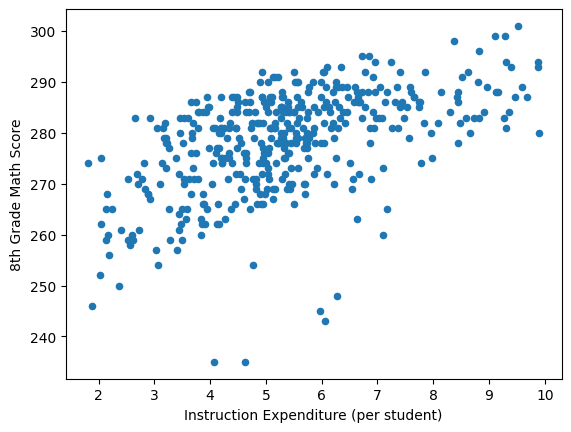

In [664]:
df.plot.scatter(x="EXPEND_INSTRUCTION_PER_STUDENT", y="MATH_8th_GRADE")
plt.xlabel('Instruction Expenditure (per student)')
plt.ylabel('8th Grade Math Score')

There is an apparent relationship between the amount of money invested in instruction, and 8th grade math exam scores. We can accept the lesser outliers that are not a part of the primary cluster across the top of the plot.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

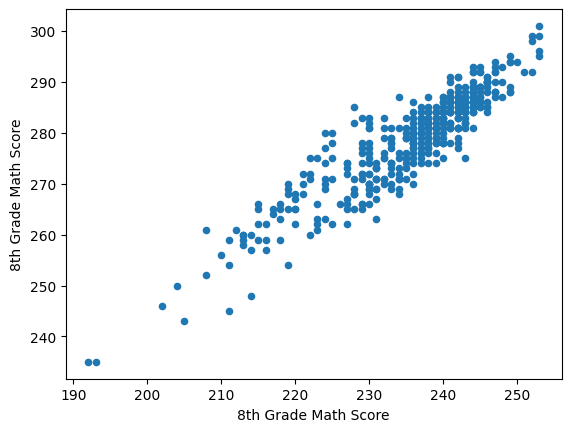

In [665]:
df.plot.scatter(x="MATH_4th_GRADE", y="MATH_8th_GRADE")
plt.xlabel('8th Grade Math Score')
plt.ylabel('8th Grade Math Score')

As expected, the relationship between math exam scores in 4th grade and 8th grade is strong. The values are tightly grouped together in the upper right portion of the plot, suggesting that the math exam scores of 4th and 8th grades are both left skewed. Observation of histograms of both scores (see prior notebook cells) confirms this.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [666]:
from sklearn.model_selection import train_test_split

In [667]:
df.shape

(424, 29)

In [668]:
X = df[["MATH_4th_GRADE", "EXPEND_INSTRUCTION_PER_STUDENT"]].dropna()
y = df.loc[X.index]["MATH_8th_GRADE"]

In [669]:
# Because we removed a majority of our dataset during our data cleaning
# process, here we will choose to utilize a greater proportion of our 
# data for training than is standard. Predictive accuracy is still important
# to evaluate, so we will not use more than 80% of the data for training.
X_train, X_test, y_train, y_test = train_test_split(
     X, y, train_size=.80, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [670]:
# import your sklearn class here
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [671]:
# create your model(s) here
model = LinearRegression()

In [672]:
model.fit(X_train, y_train)

LinearRegression()

In [673]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [674]:
from sklearn.metrics import mean_squared_error

print("r^2: ",model.score(X_test, y_test))
print("mse: ",mean_squared_error(y_test, y_pred))
print("rmse: ",mean_squared_error(y_test, y_pred, squared=False))

r^2:  0.8614528621830739
mse:  17.169988587037537
rmse:  4.143668493863564


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

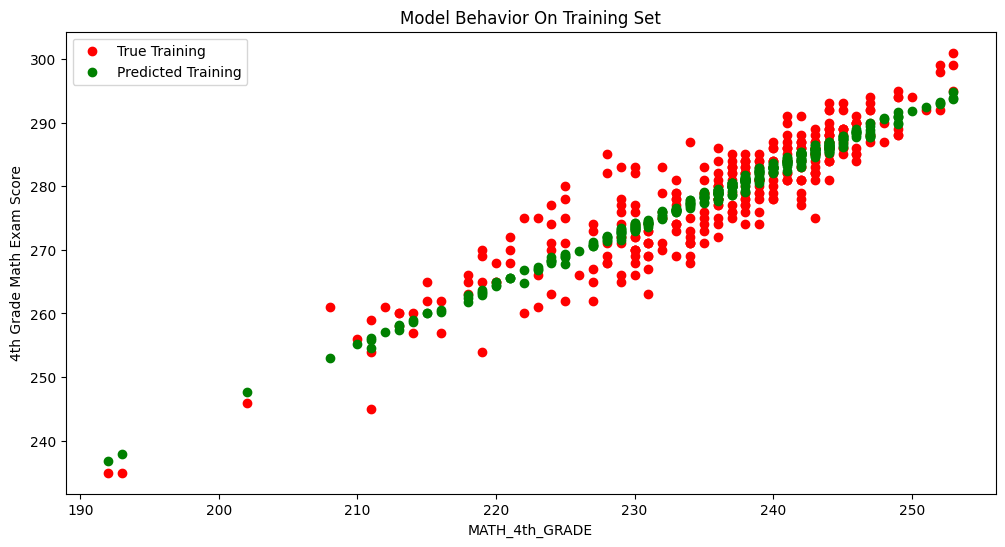

In [675]:
col_name = "MATH_4th_GRADE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Exam Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

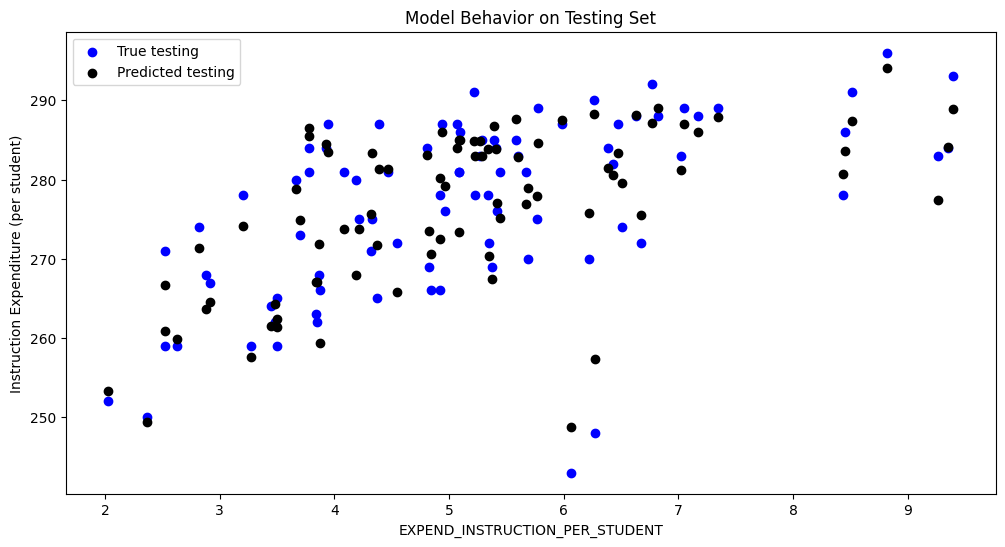

In [676]:
col_name = "EXPEND_INSTRUCTION_PER_STUDENT"
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Instruction Expenditure (per student)')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

We set out to predict NAEP 8th grade math exam scores using both instruction expenditure (spending) and 4th grade math exam scores. Instruction expenditure was divided by the number of students enrolled to account for a potential "large school -> more spending" bias. We removed nearly 75% of the data points from our dataset in order to make use of instruction expenditure . This was a result of not having a perfectly clean dataset; there existed a large number of missing values in both student enrollment data, as well as expenditure data.

Our multiple linear regression model that we trained to predict 8th grade math exam scores achieved an $R^2$ value of 0.86, which represents a relatively good fit to the data. Instruction expenditure did not have as strong of a relationship with 8th grade scores as we would like, but likely makes the model more versitile to schools with various budgets. Further analysis could be done to analyze how well the model performs with different types of expenditure levels (high spending, medium spending, etc.).

Based on the results of our model, a possible prescription for a school to increase 8th grade math exam scores would be to increase their budget for instruction efforts. However, more importantly, special focus should be put on making sure students are successful in their studies of mathematics at an early age, since 4th grade success in math is largely predictive of success later on.

Next steps could include investigating other canditiates for predictors, especially ones which require less removal of potentially useful data points. In addition, the suspected "large school -> more spending" bias could be investigated in-depth, to determine the extent to which expenditures of various kinds affect students NAEP exam scores, and thus, their comprehension of essential topics in K-12 education that will prepare them for their futures as adults.